In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
TRAIN_PATH = "/content/drive/Shareddrives/PULCA/Dataset/train/train3classes"
VAL_PATH = "/content/drive/Shareddrives/PULCA/Dataset/val/val3classes"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [4]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# tambahan layer filter

model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(512,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(1024,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# --------------------------------------------
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False,
) 

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 1561 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID-19': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 459 images belonging to 2 classes.


In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 40,
    validation_data = validation_generator,
    validation_steps=2
) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
8/8 [==============================] - 101s 11s/step - loss: 1.0184 - accuracy: 0.5078 - val_loss: 0.6745 - val_accuracy: 0.9688
Epoch 2/40
8/8 [==============================] - 69s 9s/step - loss: 0.7043 - accuracy: 0.6055 - val_loss: 0.6697 - val_accuracy: 1.0000
Epoch 3/40
8/8 [==============================] - 57s 7s/step - loss: 0.6886 - accuracy: 0.6016 - val_loss: 0.6783 - val_accuracy: 0.9688
Epoch 4/40
8/8 [==============================] - 53s 7s/step - loss: 0.6916 - accuracy: 0.5391 - val_loss: 0.6683 - val_accuracy: 0.9844
Epoch 5/40
8/8 [==============================] - 39s 5s/step - loss: 0.6883 - accuracy: 0.5664 - val_loss: 0.6609 - val_accuracy: 1.0000
Epoch 6/40
8/8 [==============================] - 34s 5s/step - loss: 0.6749 - accuracy: 0.6094 - val_loss: 0.5867 - val_accuracy: 0.9688
Epoch 7/40
8/8 [==============================] - 24s 3s/step - loss: 0.6888 - accuracy: 0.6094 - val_loss: 0.6312 - val_accuracy: 0.9844
Epoch 8/40
8/8 [================

In [11]:
# Class Activation Maps
# Grad-CAM 

(1, 224, 224, 3)

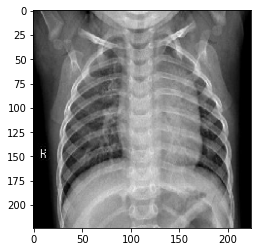

In [12]:
path= "/content/drive/Shareddrives/PULCA/Dataset/test/Normal/133.jpeg"
img = image.load_img(path, target_size=(224, 224, 3))
img = image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [13]:
predictions = (model.predict(img) > 0.5).astype("int32")

In [14]:
predictions

array([[1]], dtype=int32)